# Линейная алгебра: сходство текстов и аппроксимация функций

Данное задание основано на материалах секции, посвященной введению в линейную алгебру. Вам понадобится компьютер с установленным интерпретатором Python и подключенными библиотеками NumPy и SciPy.

### Вы научитесь:
  * читать тексты из файла с помощью Python и разбивать их на слова
  * переводить тексты в векторные пространства, вычислять расстояния в этих пространствах
  * решать системы линейных уравнений
  * приближать любые функции с помощью многочленов
  
## Введение

В этом задании вы познакомитесь с некоторыми базовыми методами из линейной алгебры, реализованными в пакете SciPy — в частности, с методами подсчета косинусного расстояния и решения систем линейных уравнений. Обе эти задачи еще много раз встретятся нам в специализации. Так, на решении систем линейных уравнений основана настройка линейных моделей — очень большого и важного класса алгоритмов машинного обучения. Косинусное расстояние же часто используется в анализе текстов для измерения сходства между ними.

## Материалы

Справка по функциям пакета scipy.linalg: http://docs.scipy.org/doc/scipy/reference/linalg.html

Справка по работе с файлами в Python: https://docs.python.org/2/tutorial/inputoutput.html#reading-and-writing-files

Справка по регулярным выражениям в Python (если вы захотите узнать про них чуть больше): https://docs.python.org/2/library/re.html

## Задача 1: сравнение предложений

Дан набор предложений, скопированных с Википедии. Каждое из них имеет "кошачью тему" в одном из трех смыслов:

  * кошки (животные)
  * UNIX-утилита cat для вывода содержимого файлов
  * версии операционной системы OS X, названные в честь семейства кошачьих
Ваша задача — найти два предложения, которые ближе всего по смыслу к расположенному в самой первой строке. В качестве меры близости по смыслу мы будем использовать косинусное расстояние.

#### Выполните следующие шаги:

1. Скачайте файл с предложениями (sentences.txt).
2. Каждая строка в файле соответствует одному предложению. Считайте их, приведите каждую к нижнему регистру с помощью строковой функции lower().
3. Произведите токенизацию, то есть разбиение текстов на слова. Для этого можно воспользоваться регулярным выражением, которое считает разделителем любой символ, не являющийся буквой: re.split('[^a-z]', t). Не забудьте удалить пустые слова после разделения.
4. Составьте список всех слов, встречающихся в предложениях. Сопоставьте каждому слову индекс от нуля до (d - 1), где d — число различных слов в предложениях. Для этого удобно воспользоваться структурой dict.
5. Создайте матрицу размера n x d, где n — число предложений. Заполните ее: элемент с индексом (i, j) в этой матрице должен быть равен количеству вхождений j-го слова в i-е предложение. У вас должна получиться матрица размера 22 * 254.
6. Найдите косинусное расстояние от предложения в самой первой строке (In comparison to dogs, cats have not undergone...) до всех остальных с помощью функции scipy.spatial.distance.cosine. Какие номера у двух предложений, ближайших к нему по этому расстоянию (строки нумеруются с нуля)? Эти два числа и будут ответами на задание.
7. Запишите полученные числа в файл, разделив пробелом. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-1.txt).
8. Совпадают ли ближайшие два предложения по тематике с первым? Совпадают ли тематики у следующих по близости предложений?

Разумеется, использованный вами метод крайне простой. Например, он не учитывает формы слов (так, cat и cats он считает разными словами, хотя по сути они означают одно и то же), не удаляет из текстов артикли и прочие ненужные слова. Позже мы будем подробно изучать анализ текстов, где выясним, как достичь высокого качества в задаче поиска похожих предложений.

In [4]:
import codecs, re, numpy as np, pandas as pd
from scipy.spatial import distance

In [5]:
with open('sentences.txt') as file_obj:
    newfile_obj = file_obj.readlines()

In [6]:
# Разделяю текст на слова и удаляю пустые строки
for i in range(len(newfile_obj)):
    newfile_obj[i] = newfile_obj[i].lower()
    newfile_obj[i] = re.split(r'[^a-z]', newfile_obj[i])
    newfile_obj[i] = [word for word in newfile_obj[i] if word]

In [7]:
# Создаю словарь пронумерованных слов
number_dictionary = {}
index = 0
for List in newfile_obj:
    for word in List:
        if (word not in number_dictionary):
            number_dictionary[word] = index
            index += 1

In [8]:
# Создаю матрицу
index = 0
matrix = np.zeros((len(newfile_obj), len(number_dictionary)))
for sentence in newfile_obj:
    for word in sentence:
        matrix[index][number_dictionary[word]] += 1
    index += 1

In [9]:
# Нахожу косинусное расстояние
cosine_dist_list = []
first_metr = matrix[0]
for i in range(len(newfile_obj)):
    second_metr = matrix[i, :]
    cosine_dist_list.append(distance.cosine(first_metr, second_metr))

print(cosine_dist_list)

[0.0, 0.9527544408738466, 0.8644738145642124, 0.8951715163278082, 0.7770887149698589, 0.9402385695332803, 0.7327387580875756, 0.9258750683338899, 0.8842724875284311, 0.9055088817476932, 0.8328165362273942, 0.8804771390665607, 0.8396432548525454, 0.8703592552895671, 0.8740118423302576, 0.9442721787424647, 0.8406361854220809, 0.956644501523794, 0.9442721787424647, 0.8885443574849294, 0.8427572744917122, 0.8250364469440588]


In [10]:
# Ищу два индекса минимальных расстояний

if cosine_dist_list[0] > cosine_dist_list[1]:
    minimum1 = 1
    minimum2 = 0
else:
    minimum1 = 0
    minimum2 = 1  
for index in range(2,len(cosine_dist_list)):
    if cosine_dist_list[index] < cosine_dist_list[minimum1]:
        temp = minimum1
        minimum1 = index
        if cosine_dist_list[temp] < cosine_dist_list[minimum2]:
            minimum2 = temp
    elif cosine_dist_list[index] < cosine_dist_list[minimum2]:
        minimum2 = index

In [11]:
with open("output.txt", 'w') as file_obj:
    file_obj.write(str(minimum1) + ' ' + str(minimum2))

## Задача 2: аппроксимация функции

Рассмотрим сложную математическую функцию на отрезке [1, 15]:

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

Как известно, многочлен степени n (то есть w_0 + w_1 x + w_2 x^2 + ... + w_n x^n) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты w_0, ... w_n можно определить из следующей системы линейных уравнений:


где через x_1, ..., x_n, x_{n+1} обозначены точки, через которые проходит многочлен, а через f(x_1), ..., f(x_n), f(x_{n+1}) — значения, которые он должен принимать в этих точках.

Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.

1. Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?
2. Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?
3. Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)
4. Запишите полученные числа в файл, разделив пробелами. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-2.txt).

In [46]:
from matplotlib import pylab as plt
import numpy as np, math
%matplotlib inline

def f(x):
    return np.sin(x/5)*np.exp(x/10)+5*np.exp(-x/2)

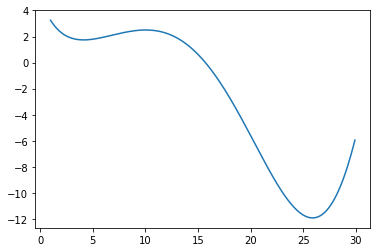

In [47]:
x = np.arange(1, 30, 0.1)
y = f(x)
plt.plot(x, y)

In [62]:
A = np.array([[1,1],[1,15]], dtype=float)
b = np.array([f(1), f(15)])
x = np.linalg.solve(A, b)

In [60]:
A = np.array([[1,1,1], [1,8,64], [1,15,225]], dtype=float)
b = np.array([f(1), f(8), f(15)])
x = np.linalg.solve(A, b)

In [61]:
A = np.array([[1,1,1,1], [1,4,16,64], [1,10,100,1000], [1,15,225,3375]], dtype=float)
b = np.array([f(1), f(4), f(10), f(15)])
x = np.linalg.solve(A, b)

In [55]:
print(x)
tf = open('c:\\output.txt', 'w')
for x_i in x:
    tf.write(str(round(x_i, 2))+' ')
tf.close()

[ 4.36264154 -1.29552587  0.19333685 -0.00823565]
